In [1]:
import json 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 1. 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 2. 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

# 1. Data

In [2]:
# 데이터 정제
import re

def preprocess_sentence(sentence):
    
    # 1. 소문자로 변환
    sentence = sentence.lower()
    
    # 2. 이스케이프된 줄바꿈 문자열 제거 (예: '\\n', '\\n\\n')
    sentence = re.sub(r'\\n+', '', sentence)  # 문자열 안에 백슬래시 2개로 표현된 \n들
    
    #    줄바꿈(\n) 제거
    sentence = sentence.replace('\n', '')

    # 3. 알파벳, 문장부호([?.!,]), 숫자, 한글만 남기고 모두 제거
    sentence = re.sub(r"[^a-zA-Z0-9가-힣?.!,]",  " ", sentence)

    # 4. 문장부호 양옆에 공백 추가
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    
    # 5. 단어로 'n' 제거 (띄어쓰기 기반, 예: " n " 또는 "n.")
    sentence = re.sub(r'\bn\b', '', sentence)

    # 6. 여러 공백을 하나로 축소
    sentence = re.sub(r"\s+", " ", sentence)

    # 7. 문장 앞뒤 공백 제거
    sentence = sentence.strip()
    
    return sentence

In [3]:
def get_short_length_ratio(data, field, max_len=2):
    """
    특정 필드에서 길이가 max_len 이하인 항목 비율 계산.

    Parameters:
        data (list): 딕셔너리들의 리스트
        field (str): 검사할 필드명 (예: 'prompt', 'completion_0')
        max_len (int): 최대 길이 기준 (기본값: 2)

    Returns:
        tuple: (전체 항목 수, 기준 이하 항목 수, 비율)
    """
    total = len(data)
    count_under = sum(
        len(item[field]) <= max_len
        for item in data
        if field in item and isinstance(item[field], str)
    )
    ratio = count_under / total if total > 0 else 0
    
    print(f"전체 항목 수: {total }")
    print(f"{max_len}자 이하 항목 수: {count_under}")
    print(f"비율: {ratio:.2%}")
    
    return total, count_under, ratio

In [4]:
def save_jsonl(data, save_path):
    with open(save_path, 'w', encoding='utf-8-sig') as f:
        json.dump(data, f, ensure_ascii=False, indent=2)
        

**1) SFT Data**

In [5]:
import json 
data_path_1_SFT = '/aiffel/KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl' 
with open(data_path_1_SFT, "r", encoding='utf-8-sig') as json_file:
    sft_data_dict = json.load(json_file)

print(len(sft_data_dict))
sft_data_dict[:3]

12000


[{'prompt': '불고기용 고기 한우에요?',
  'completion': "'저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.",
  'tokens': 193},
 {'prompt': '쓰던 앱이 유료로 전환됐어',
  'completion': "'어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다. 하지만, 일반적으로 유료 전환된 앱은 기존 무료 앱에서 추가적인 기능이나 서비스를 제공하는 경우가 많습니다. 이 경우, 유료 전환 이전 가격이 매우 저렴하거나 무료인 경우가 많으므로, 앱을 계속 사용하려면 추가적인 비용을 지불해야 할 수 있습니다. 하지만, 유료 전환 이후에는 기존 사용자 또는 새로운 사용자 모두가 추가 기능과 높은 품질의 서비스를 이용할 수 있게 됩니다. 따라서, 앱 개발자는 유료 모델로 전환함으로써 앱의 수익을 증가시키고 더 나은 서비스를 제공할 수 있습니다.",
  'tokens': 288},
 {'prompt': '여친이랑 다툼',
  'completion': "'저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다. 하지만 다투게 되면 상대방의 말을 경청하는 태도와 서로의 감정을 존중하는 것이 중요합니다. 논리적이고 차분한 대화를 통해 문제를 해결해보세요. 그리고 서로를 이해하고 서로의 의견을 수용하는 것이 중요합니다.",
  'tokens': 153}]

In [6]:
print(type(sft_data_dict))

<class 'list'>


총 샘플 수: 12000
최소 토큰 수: 17
최대 토큰 수: 1111
평균 토큰 수: 159.31


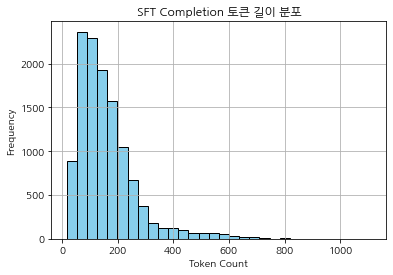

In [7]:
import matplotlib.pyplot as plt

# 1. 토큰 수 리스트 추출
token_lengths = [item['tokens'] for item in sft_data_dict if 'tokens' in item]

# 2. 간단한 통계 출력
print(f"총 샘플 수: {len(token_lengths)}")
print(f"최소 토큰 수: {min(token_lengths)}")
print(f"최대 토큰 수: {max(token_lengths)}")
print(f"평균 토큰 수: {sum(token_lengths)/len(token_lengths):.2f}")

# 3. 분포 시각화 (히스토그램)
plt.hist(token_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("SFT Completion 토큰 길이 분포")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [8]:
#  데이터 정제 (clean_text 적용)
for item in sft_data_dict:
    for key in ['prompt', 'completion']:
        item[key] = preprocess_sentence(item[key])

#  결과 확인
print(len(sft_data_dict))
sft_data_dict[:3]

12000


[{'prompt': '불고기용 고기 한우에요 ?',
  'completion': '저는 인공지능 챗봇이며 , 직접적으로 식품에 관한 정보를 가지고 있지 않습니다 . 하지만 일반적으로 불고기용 고기는 한우 , 쇠고기 , 돼지고기 등 다양한 종류의 고기를 사용합니다 . 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에 , 한우를 사용하는 경우도 많습니다 . 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다 .',
  'tokens': 193},
 {'prompt': '쓰던 앱이 유료로 전환됐어',
  'completion': '어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다 . 하지만 , 일반적으로 유료 전환된 앱은 기존 무료 앱에서 추가적인 기능이나 서비스를 제공하는 경우가 많습니다 . 이 경우 , 유료 전환 이전 가격이 매우 저렴하거나 무료인 경우가 많으므로 , 앱을 계속 사용하려면 추가적인 비용을 지불해야 할 수 있습니다 . 하지만 , 유료 전환 이후에는 기존 사용자 또는 새로운 사용자 모두가 추가 기능과 높은 품질의 서비스를 이용할 수 있게 됩니다 . 따라서 , 앱 개발자는 유료 모델로 전환함으로써 앱의 수익을 증가시키고 더 나은 서비스를 제공할 수 있습니다 .',
  'tokens': 288},
 {'prompt': '여친이랑 다툼',
  'completion': '저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다 . 하지만 다투게 되면 상대방의 말을 경청하는 태도와 서로의 감정을 존중하는 것이 중요합니다 . 논리적이고 차분한 대화를 통해 문제를 해결해보세요 . 그리고 서로를 이해하고 서로의 의견을 수용하는 것이 중요합니다 .',
  'tokens': 153}]

총 샘플 수: 12000
최소 토큰 수: 0
최대 토큰 수: 289
평균 토큰 수: 22.72


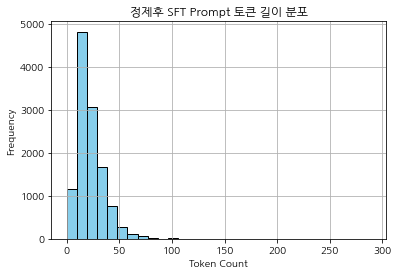

In [9]:
# 1. 문자 수 리스트 추출
token_lengths = [len(item['prompt'].strip()) for item in sft_data_dict if 'prompt' in item]

# 2. 간단한 통계 출력
print(f"총 샘플 수: {len(token_lengths)}")
print(f"최소 토큰 수: {min(token_lengths)}")
print(f"최대 토큰 수: {max(token_lengths)}")
print(f"평균 토큰 수: {sum(token_lengths)/len(token_lengths):.2f}")

# 3. 분포 시각화 (히스토그램)
plt.hist(token_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("정제후 SFT Prompt 토큰 길이 분포")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [10]:
check_len = 1

print('prompt')
total, short_count, ratio = get_short_length_ratio(sft_data_dict, field='prompt', max_len=check_len)
print()

print('completion')
total, short_count, ratio = get_short_length_ratio(sft_data_dict, field='completion', max_len=check_len)
print()

prompt
전체 항목 수: 12000
1자 이하 항목 수: 8
비율: 0.07%

completion
전체 항목 수: 12000
1자 이하 항목 수: 0
비율: 0.00%



In [11]:
# prompt가 비어있는 항목 
for item in sft_data_dict :
    if len(item['prompt']) ==0 :
         print(item )    

{'prompt': '', 'completion': 'sorry , as an ai language model , i need more information about what you are asking . please provide me with more context so that i can assist you better .', 'tokens': 40}
{'prompt': '', 'completion': 'as an ai language model , i do not have a physical body or consciousness , so i do not experience emotions in the same way humans do . however , i am designed to understand and respond appropriately to emotional language and can provide empathetic responses to help simulate human like interactions .', 'tokens': 63}
{'prompt': '', 'completion': 'as an ai language model , i don t have personal beliefs or preferences as humans do . i m programmed to provide accurate and unbiased responses based on the data that i have been trained on . my responses are neutral and not influenced by external factors such as race , gender , religion , or political affiliations . , token 69', 'tokens': 69}


In [12]:
for item in sft_data_dict :
    if len(item['prompt']) ==1 :
         print(item )   

{'prompt': '헉', 'completion': '저를 놀래키거나 놀라게 하셨나요 ? 무슨 일이 있으신가요 ? 저는 인공지능 어시스턴트이며 , 도움이 필요하시다면 언제든지 말씀해주세요 !', 'tokens': 86}
{'prompt': '휴', 'completion': '휴 , 그것은 쉬는 것을 의미하는 단어입니다 . 일상적으로 사용되며 , 휴식을 취함으로써 몸과 마음을 힐링하고 새로운 에너지를 충전할 수 있습니다 . 일하며 지친 마음과 몸이 휴식을 취하면 사람은 더 행복하고 건강해질 수 있습니다 . 휴식은 일과 생활에서 매우 중요한 요소이며 , 적극적으로 취하는 것이 좋습니다 .', 'tokens': 169}
{'prompt': '후', 'completion': '등나무가 아름다운 가을 풍경을 만들고 있습니다 . 적포도나무와 갈색 단풍나무와 함께 멋진 빨간색과 황금색의 잎사귀가 드리워져 있습니다 . 하늘은 맑고 푸르며 , 태양은 차분하게 떠 있습니다 . 이런 아름다운 자연 속에서 산책을 즐기는 것은 최고의 경험이 될 것입니다 .', 'tokens': 159}
{'prompt': '네', 'completion': '네 , 팀장님 . 무엇을 도와드릴까요 ?', 'tokens': 34}
{'prompt': '음', 'completion': '죄송합니다 , 이전에 질문하신 내용이 불분명하여 대답을 드리지 못하였습니다 . 더 자세한 내용을 알려주시면 최대한 빠르고 정확하게 답변 드리도록 하겠습니다 . 감사합니다 .', 'tokens': 96}


In [13]:
# prompt가 비어있지 않은 항목만 남김
# 1자리도 삭제
sft_data_dict = [item for item in sft_data_dict if 'prompt' in item and len(item['prompt']) > 1]
len(sft_data_dict)

11992

총 샘플 수: 11992
최소 토큰 수: 2
최대 토큰 수: 1456
평균 토큰 수: 145.94


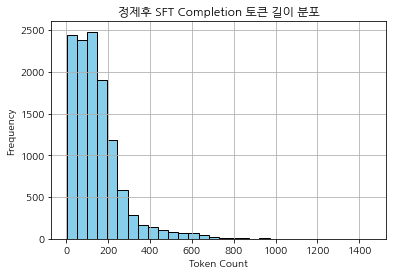

In [14]:
# 1. 문자 수 리스트 추출
token_lengths = [len(item['completion'].strip()) for item in sft_data_dict if 'completion' in item]

# 2. 간단한 통계 출력
print(f"총 샘플 수: {len(token_lengths)}")
print(f"최소 토큰 수: {min(token_lengths)}")
print(f"최대 토큰 수: {max(token_lengths)}")
print(f"평균 토큰 수: {sum(token_lengths)/len(token_lengths):.2f}")

# 3. 분포 시각화 (히스토그램)
plt.hist(token_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("정제후 SFT Completion 토큰 길이 분포")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [15]:
check_len = 450

print('completion')
total, short_count, ratio = get_short_length_ratio(sft_data_dict, field='completion', max_len=check_len)
print()

completion
전체 항목 수: 11992
450자 이하 항목 수: 11579
비율: 96.56%



In [16]:
data_save_path_SFT = './data/clean_kochatgpt_1_SFT.jsonl'
save_jsonl(sft_data_dict, data_save_path_SFT)

In [17]:
with open(data_save_path_SFT, "r", encoding='utf-8-sig') as json_file:
    sft_tmp = json.load(json_file)

print(len(sft_tmp))
sft_tmp[:3]

11992


[{'prompt': '불고기용 고기 한우에요 ?',
  'completion': '저는 인공지능 챗봇이며 , 직접적으로 식품에 관한 정보를 가지고 있지 않습니다 . 하지만 일반적으로 불고기용 고기는 한우 , 쇠고기 , 돼지고기 등 다양한 종류의 고기를 사용합니다 . 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에 , 한우를 사용하는 경우도 많습니다 . 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다 .',
  'tokens': 193},
 {'prompt': '쓰던 앱이 유료로 전환됐어',
  'completion': '어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다 . 하지만 , 일반적으로 유료 전환된 앱은 기존 무료 앱에서 추가적인 기능이나 서비스를 제공하는 경우가 많습니다 . 이 경우 , 유료 전환 이전 가격이 매우 저렴하거나 무료인 경우가 많으므로 , 앱을 계속 사용하려면 추가적인 비용을 지불해야 할 수 있습니다 . 하지만 , 유료 전환 이후에는 기존 사용자 또는 새로운 사용자 모두가 추가 기능과 높은 품질의 서비스를 이용할 수 있게 됩니다 . 따라서 , 앱 개발자는 유료 모델로 전환함으로써 앱의 수익을 증가시키고 더 나은 서비스를 제공할 수 있습니다 .',
  'tokens': 288},
 {'prompt': '여친이랑 다툼',
  'completion': '저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다 . 하지만 다투게 되면 상대방의 말을 경청하는 태도와 서로의 감정을 존중하는 것이 중요합니다 . 논리적이고 차분한 대화를 통해 문제를 해결해보세요 . 그리고 서로를 이해하고 서로의 의견을 수용하는 것이 중요합니다 .',
  'tokens': 153}]

**2) RM Data**

In [18]:
data_path_2_RM = '/aiffel/KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl'
with open(data_path_2_RM, "r", encoding='utf-8-sig') as json_file:
    rm_data_dict = json.load(json_file)

print(len(rm_data_dict))
rm_data_dict[:3]

10220


[{'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?',
  'completion_0': 'Allow me to answer your question. I know that you are curious about me.',
  'completion_1': '번디는 다양한 인터뷰자들과 뉴스홍보 담당자들과의 면담 때 밝혔다.',
  'completion_2': '라이언에게 말했다.',
  'ranking': [2, 1, 0]},
 {'prompt': '개포주공아파트는 몇 단지로 이루어져 있나?',
  'completion_0': '개포주공아파트는 다섯 단지로 이루어져 있습니다.',
  'completion_1': '이날 목송에서 구글상위노',
  'completion_2': '개포주공아파트는 총 27개 단지로 이루어져 있습니다.',
  'ranking': [2, 0, 1]},
 {'prompt': '김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는?',
  'completion_0': 'The diameter of the Metallic domain is bigger than the Hyperonic domain.',
  'completion_1': '이 질문은 조금 불분명합니다. 김영삼 대통령이 후보 시절에 어떤 발언을 했고, 누가 그 발언을 문제삼았는지에 따라 답이 다를 수 있습니다.\\n\\n만약 김영삼 대통령이 후보 시절에 지역표심을 겨냥한 발언을 했다는 가정하에, 그 발언을 문제삼은 후보가 누구였는지를 대답하자면, 그 답은 이화선 당시 민주당 대통령 후보가 될 것입니다. 1992년 총선 때, 김영삼 대선후보는 "집값이 오른 노량진역 부근의 부동산 가격은 세월호 폭침 후 \\\'강남 도시재생\\\' 일환으로 상승했다"는 발언을 했습니다. 하지만 이화선 후보는 이 발언을 "전국적으로 경제적 발전이 이루어지지 않은 지방민의 마음을 멀리해지려는 무례한 발언"이라고 비판하며 문

In [19]:
import matplotlib.pyplot as plt

def show_token_count_for_rm_data():
    # 1. 문자 수 리스트 추출
    prompt_lengths = [len(item['prompt'].strip()) for item in rm_data_dict if 'prompt' in item]
    completion_0_lengths = [len(item['completion_0'].strip()) for item in rm_data_dict if 'completion_0' in item]
    completion_1_lengths = [len(item['completion_1'].strip()) for item in rm_data_dict if 'completion_1' in item]
    completion_2_lengths = [len(item['completion_2'].strip()) for item in rm_data_dict if 'completion_2' in item]

    # 2. 간단한 통계 출력
    print(f"총 샘플 수: {len(prompt_lengths)}")
    print(f"최소 prompt 토큰 수: {min(prompt_lengths)}")
    print(f"최대 prompt 토큰 수: {max(prompt_lengths)}")
    print(f"평균 prompt 토큰 수: {sum(prompt_lengths)/len(prompt_lengths):.2f}")
    print()

    print(f"총 샘플 수: {len(completion_0_lengths)}")
    print(f"최소 completion_0 토큰 수: {min(completion_0_lengths)}")
    print(f"최대 completion_0 토큰 수: {max(completion_0_lengths)}")
    print(f"평균 completion_0 토큰 수: {sum(completion_0_lengths)/len(completion_0_lengths):.2f}")
    print()

    print(f"총 샘플 수: {len(completion_1_lengths)}")
    print(f"최소 completion_1 토큰 수: {min(completion_1_lengths)}")
    print(f"최대 completion_1 토큰 수: {max(completion_1_lengths)}")
    print(f"평균 completion_1 토큰 수: {sum(completion_1_lengths)/len(completion_1_lengths):.2f}")
    print()

    print(f"총 샘플 수: {len(completion_2_lengths)}")
    print(f"최소 completion_2 토큰 수: {min(completion_2_lengths)}")
    print(f"최대 completion_2 토큰 수: {max(completion_2_lengths)}")
    print(f"평균 completion_2 토큰 수: {sum(completion_2_lengths)/len(completion_2_lengths):.2f}")
    print()

    # 3. 분포 시각화 (히스토그램)
    # 2행 2열 subplot 생성
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # 첫 번째 subplot: prompt
    axes[0, 0].hist(prompt_lengths, bins=30, color='skyblue', edgecolor='black')
    axes[0, 0].set_title("Prompt 길이 분포")
    axes[0, 0].set_xlabel("문자 수")
    axes[0, 0].set_ylabel("Frequency")

    # 두 번째 subplot: completion_0
    axes[0, 1].hist(completion_0_lengths, bins=30, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title("Completion_0 길이 분포")
    axes[0, 1].set_xlabel("문자 수")
    axes[0, 1].set_ylabel("Frequency")

    # 세 번째 subplot: completion_1
    axes[1, 0].hist(completion_1_lengths, bins=30, color='salmon', edgecolor='black')
    axes[1, 0].set_title("Completion_1 길이 분포")
    axes[1, 0].set_xlabel("문자 수")
    axes[1, 0].set_ylabel("Frequency")

    # 네 번째 subplot: tokens
    axes[1, 1].hist(completion_2_lengths, bins=30, color='orange', edgecolor='black')
    axes[1, 1].set_title("Completion_2 수 분포")
    axes[1, 1].set_xlabel("토큰 수")
    axes[1, 1].set_ylabel("Frequency")

    # 전체 그래프 레이아웃 정리
    plt.tight_layout()
    plt.show()

총 샘플 수: 10220
최소 prompt 토큰 수: 0
최대 prompt 토큰 수: 295
평균 prompt 토큰 수: 22.20

총 샘플 수: 10220
최소 completion_0 토큰 수: 0
최대 completion_0 토큰 수: 3088
평균 completion_0 토큰 수: 117.49

총 샘플 수: 10220
최소 completion_1 토큰 수: 0
최대 completion_1 토큰 수: 3694
평균 completion_1 토큰 수: 116.81

총 샘플 수: 10220
최소 completion_2 토큰 수: 0
최대 completion_2 토큰 수: 2979
평균 completion_2 토큰 수: 116.01



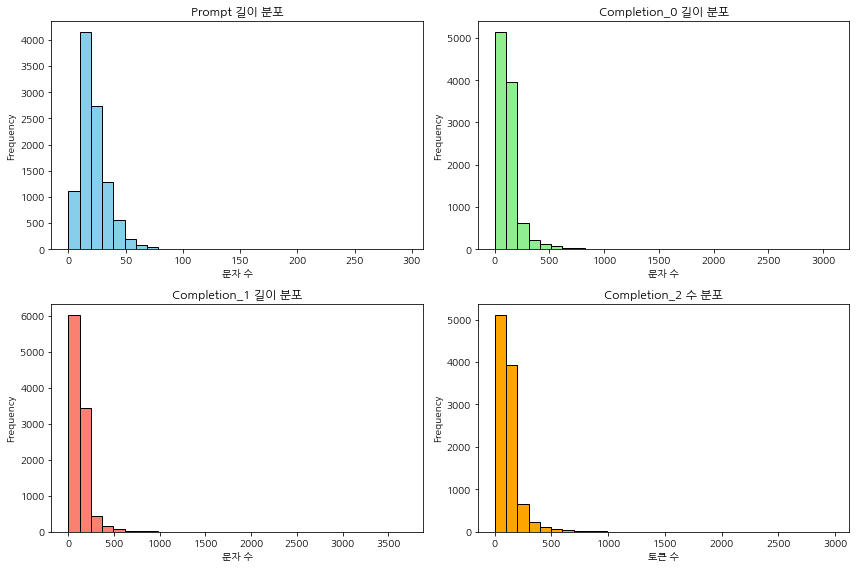

In [20]:
show_token_count_for_rm_data()

In [21]:
#  데이터 정제 
for item in rm_data_dict:
    for key in ['prompt', 'completion_0', 'completion_1', 'completion_2']:
        item[key] = preprocess_sentence(item[key])

#  결과 확인
print(len(rm_data_dict))
rm_data_dict[:3]

10220


[{'prompt': '번디는 자신이 탐정잡지 , 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나 ?',
  'completion_0': 'allow me to answer your question . i know that you are curious about me .',
  'completion_1': '번디는 다양한 인터뷰자들과 뉴스홍보 담당자들과의 면담 때 밝혔다 .',
  'completion_2': '라이언에게 말했다 .',
  'ranking': [2, 1, 0]},
 {'prompt': '개포주공아파트는 몇 단지로 이루어져 있나 ?',
  'completion_0': '개포주공아파트는 다섯 단지로 이루어져 있습니다 .',
  'completion_1': '이날 목송에서 구글상위노',
  'completion_2': '개포주공아파트는 총 27개 단지로 이루어져 있습니다 .',
  'ranking': [2, 0, 1]},
 {'prompt': '김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는 ?',
  'completion_0': 'the diameter of the metallic domain is bigger than the hyperonic domain .',
  'completion_1': '이 질문은 조금 불분명합니다 . 김영삼 대통령이 후보 시절에 어떤 발언을 했고 , 누가 그 발언을 문제삼았는지에 따라 답이 다를 수 있습니다 . 만약 김영삼 대통령이 후보 시절에 지역표심을 겨냥한 발언을 했다는 가정하에 , 그 발언을 문제삼은 후보가 누구였는지를 대답하자면 , 그 답은 이화선 당시 민주당 대통령 후보가 될 것입니다 . 1992년 총선 때 , 김영삼 대선후보는 집값이 오른 노량진역 부근의 부동산 가격은 세월호 폭침 후 강남 도시재생 일환으로 상승했다 는 발언을 했습니다 . 하지만 이화선 후보는 이 발언을 전국적으로 경제적 발전이 이루어지지 않은 지방민의 마음을 멀리해지려는 무례한 발언 이라고 비판

In [22]:
# 사용: prompt 길이 0 이하 비율 계산
check_len = 0

print('prompt')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='prompt', max_len=check_len)
print()
print('completion_0')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='completion_0', max_len=check_len)
print()
print('completion_1')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='completion_1', max_len=check_len)
print()
print('completion_2')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='completion_1', max_len=check_len)

prompt
전체 항목 수: 10220
0자 이하 항목 수: 3
비율: 0.03%

completion_0
전체 항목 수: 10220
0자 이하 항목 수: 21
비율: 0.21%

completion_1
전체 항목 수: 10220
0자 이하 항목 수: 21
비율: 0.21%

completion_2
전체 항목 수: 10220
0자 이하 항목 수: 21
비율: 0.21%


In [23]:
for item in rm_data_dict :
    if len(item['prompt']) == 0 :
         print(item )    

{'prompt': '', 'completion_0': 'sorry , as an ai language model , i need more information about what you are asking . please provide me with more context so that i can assist you better .', 'completion_1': 'the first step in any new project is to choose a goal . there are many different types of goals , but some common goals are to achieve a goal , to work towards a goal , and to learn from a goal . there are many different ways to achieve a goal , but some common goals are to achieve a goal , to work towards a goal , and to learn from a goal .', 'completion_2': 'package com . example . demo . controller import com . example . demo . model . user import com . example . demo . service . userservice import org . springframework . beans . factory . annotation . autowired import org . springframework . web . bind . annotation . import java . util . list restcontroller requestmapping user public class usercontroller autowired private userservice userservice getmapping all public list user g

In [24]:
for item in rm_data_dict :
    if len(item['completion_0']) == 0 :
         print(item )

{'prompt': '용자특급 마이트가인이 몇 번째 용자 시리즈이지', 'completion_0': '', 'completion_1': '초급 , 중급 , 고급 , 특급 , 마이트가인 순으로 총 다섯 번째 용자 시리즈입니다 .', 'completion_2': '마이트가인은 용자 시리즈의 6번째 용자입니다 .', 'ranking': [1, 2, 0]}
{'prompt': '이제 3주정도 되가는데 점점 좋아지고있어', 'completion_0': '', 'completion_1': '. 함께 노력하는 것 자체가 좋다는 걸 점점 느껴져서 좋아요 . 계속 함께 노력하길 바라며 , 여러분들도 좋은 결과를 얻길 바래요 !', 'completion_2': '서비스를 이용하시면서 점점 만족도가 높아지고 있는 것 같아서 다행입니다 . 저희는 언제나 사용자분들의 피드백에 귀기울이며 개선 방안을 모색하여 최상의 서비스를 제공하기 위해 노력하고 있습니다 . 앞으로도 다양한 기능과 개선 사항을 추가해 나가겠습니다 . 감사합니다 .', 'ranking': [2, 1, 0]}
{'prompt': '2017년 1월 가수 서인영은 어떤 프로그램 스태프와 갈등이 있었지', 'completion_0': '', 'completion_1': '요 ? 2017년 1월에는 서인영의 엠카운트다운 출연 및 같이 출연하는 방송 프로그램 스태프과의 갈등이 있었습니다 . 서인영은 이번 갈등의 원인으로 미리 준비한 노래를 방송관련 조치로 제한받아 불평하기도 하였습니다 . 또한 엠카운트다운 스태프가 서인영의 인기도 높아지면서 미소녀시대의 양상을 띄기도 한다고 지적하여 논란이 번지기도 하였습니다 .', 'completion_2': '알려진 바에 따르면 , 2017년 1월 서인영은 sbs 예능 프로그램 가시나들 의 스태프와 갈등을 겪었다고 전해졌습니다 . 이 프로그램에서는 서인영이 함께 출연하는 4인조 가수 그룹 볼빨간사춘기 의 멤버들과 함께 다양한 미션을 수행하는 내용이었습니다 . 이번 갈등의 원인은 서인영이 스태

In [25]:
# prompt가 비어있지 않은 항목만 남김
rm_data_dict = [item for item in rm_data_dict if 'prompt' in item and len(item['prompt']) > 0]
len(rm_data_dict)

# completion_0 비어있지 않은 항목만 남김
rm_data_dict = [item for item in rm_data_dict if 'completion_0' in item and len(item['completion_0']) > 0]
len(rm_data_dict)

# completion_1 비어있지 않은 항목만 남김
rm_data_dict = [item for item in rm_data_dict if 'completion_1' in item and len(item['completion_1']) > 0]
len(rm_data_dict)

# completion_2 비어있지 않은 항목만 남김
rm_data_dict = [item for item in rm_data_dict if 'completion_2' in item and len(item['completion_2']) > 0]
len(rm_data_dict)

10152

In [26]:
# 사용: prompt 길이 1 이하 비율 계산
check_len = 1

print('prompt')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='prompt', max_len=check_len)
print()
print('completion_0')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='completion_0', max_len=check_len)
print()
print('completion_1')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='completion_1', max_len=check_len)
print()
print('completion_2')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='completion_1', max_len=check_len)

prompt
전체 항목 수: 10152
1자 이하 항목 수: 4
비율: 0.04%

completion_0
전체 항목 수: 10152
1자 이하 항목 수: 26
비율: 0.26%

completion_1
전체 항목 수: 10152
1자 이하 항목 수: 19
비율: 0.19%

completion_2
전체 항목 수: 10152
1자 이하 항목 수: 19
비율: 0.19%


In [27]:
for item in rm_data_dict :
    if len(item['prompt']) == 1 :
         print(item ) 

{'prompt': '음', 'completion_0': '죄송합니다 , 이전에 질문하신 내용이 불분명하여 대답을 드리지 못하였습니다 . 더 자세한 내용을 알려주시면 최대한 빠르고 정확하게 답변 드리도록 하겠습니다 . 감사합니다 .', 'completion_1': '1 . positive2 . accepting3 . kind4 . understanding5 . patient6 . generous7 . compassionate8 . respectful9 . forgiving10 . supportive', 'completion_2': '. 4 days ago . 4 days ago', 'ranking': [0, 1, 2]}
{'prompt': '네', 'completion_0': '이버 아이디로 로그인네이버 아이디로 로그인을 하려면 먼저 네이버 계정을 만들어야 합니다 . 네이버 계정을 만들기 위해서는 네이버 홈페이지에 접속하여 가입하거나 네이버 앱을 사용하여 가입할 수 있습니다 . 가입이 완료되면 로그인 페이지로 이동하여 아이디', 'completion_1': '이뷀스트 sonic the hedgehog sonic is a hedgehog who is sent to track down the creator of a dangerous virus . he becomes infected and becomes the virus ucdhama . when sonic meets his new friend , dr . eggman , he is able to help sonic fix the virus and save the world .', 'completion_2': '네 , 팀장님 . 무엇을 도와드릴까요 ?', 'ranking': [2, 0, 1]}
{'prompt': '휴', 'completion_0': '를 구글광고노출대시원하게 구글광고노출대받으면https www . box . com시원하게 구글광고노출대받으면https www . box . com', 'complet

In [28]:
# prompt가 1 초과인 항목만 님김
rm_data_dict = [item for item in rm_data_dict if 'prompt' in item and len(item['prompt']) > 1]
len(rm_data_dict)

10148

10220 -> 10148

In [29]:
for item in rm_data_dict :
    if len(item['completion_0']) == 1 :
         print(item )

{'prompt': '정두언 의원이 빈곤가정 재수생과 코피노 아동에게 기부한 것은 무엇인가 ?', 'completion_0': '이', 'completion_1': '가정에 필요한 생필품인 라면 , 생수 , 염소고기 , 쌀 , 잡곡 , 오일 , 밀가루 등을 기부한 것으로 보입니다 .', 'completion_2': '정두언 의원이 빈곤가정 재수생과 코피노 아동에게 기부한 것은 독서실 비용 지원과 교육재료 지원입니다 .', 'ranking': [2, 1, 0]}
{'prompt': '막장으로 가네', 'completion_0': '트', 'completion_1': '종료합니다 . 감사합니다 .', 'completion_2': '죄송합니다 . 막장에 가는 것은 좋지 않은 일입니다 . 좀 더 평화로운 장소로 가시는 것을 권장합니다 .', 'ranking': [2, 1, 0]}
{'prompt': '몸에서 멀어지면 맘에서도 멀어진데', 'completion_0': '그', 'completion_1': 'if i drift away from your body , i ll also drift away from your heart .', 'completion_2': '이 말의 의미는 , 어떤 사람이나 것이 멀리 떨어져 있으면 그것에 대한 감정도 같이 멀어진다는 것입니다 . 즉 , 멀리 떨어져 있으면 그것에 대한 관심이 줄어든다는 것을 뜻합니다 . 이는 말 그대로 먼 거리에서는 마음도 먼 거리에서 로 해석할 수 있으며 , 관계나 사람들 간의 이해와 접근에 대해 생각해 볼 수 있습니다 . , token 184', 'ranking': [2, 1, 0]}
{'prompt': '척준경은 누구의 아들이야', 'completion_0': '깜', 'completion_1': '척준경은 이순신의 아들이다 .', 'completion_2': '저는 해당 인물에 대한 정보를 찾을 수 없어 정확한 답변을 제공할 수 없습니다 . 추가적인 정보가 있다면 제공해주시면 더 정확한 답변을 드릴 수 

completion_0이 1자리 문자이고, ranking이 2가 아닌 경우에는 삭제하는 것이 좋겠음

In [30]:
# 필터링: 삭제 조건에 해당하지 않는 항목만 남김
rm_data_dict = [
    item for item in rm_data_dict
    if not (
        'completion_0' in item and len(item['completion_0']) == 1
        and 'ranking' in item and isinstance(item['ranking'], list)
        and len(item['ranking']) > 0 and item['ranking'][0] != 2
    )
]
len(rm_data_dict)

10137

In [31]:
# 필터링: 삭제 조건에 해당하지 않는 항목만 남김
rm_data_dict = [
    item for item in rm_data_dict
    if not (
        'completion_1' in item and len(item['completion_1']) == 1
        and 'ranking' in item and isinstance(item['ranking'], list)
        and len(item['ranking']) > 0 and item['ranking'][1] != 2
    )
]
len(rm_data_dict)

10127

In [32]:
# 필터링: 삭제 조건에 해당하지 않는 항목만 남김
rm_data_dict = [
    item for item in rm_data_dict
    if not (
        'completion_2' in item and len(item['completion_2']) == 1
        and 'ranking' in item and isinstance(item['ranking'], list)
        and len(item['ranking']) > 0 and item['ranking'][2] != 2
    )
]
len(rm_data_dict)

10126

총 샘플 수: 10126
최소 prompt 토큰 수: 2
최대 prompt 토큰 수: 257
평균 prompt 토큰 수: 22.65

총 샘플 수: 10126
최소 completion_0 토큰 수: 1
최대 completion_0 토큰 수: 2759
평균 completion_0 토큰 수: 117.45

총 샘플 수: 10126
최소 completion_1 토큰 수: 1
최대 completion_1 토큰 수: 3562
평균 completion_1 토큰 수: 116.58

총 샘플 수: 10126
최소 completion_2 토큰 수: 1
최대 completion_2 토큰 수: 2740
평균 completion_2 토큰 수: 115.83



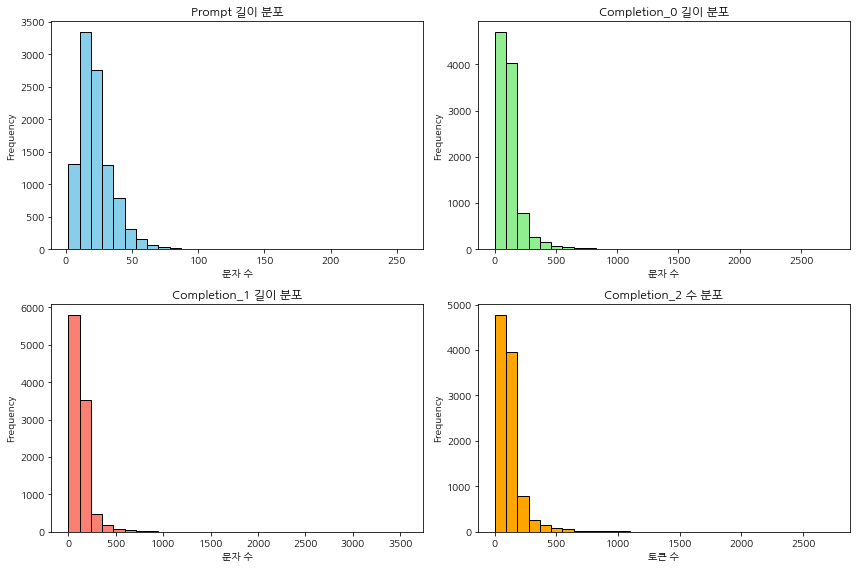

In [33]:
show_token_count_for_rm_data()

In [34]:

print('prompt')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='prompt', max_len=50)
print()

check_len = 400

print('completion_0')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='completion_0', max_len=check_len)
print()
print('completion_1')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='completion_1', max_len=check_len)
print()
print('completion_2')
total, short_count, ratio = get_short_length_ratio(rm_data_dict, field='completion_1', max_len=check_len)

prompt
전체 항목 수: 10126
50자 이하 항목 수: 9760
비율: 96.39%

completion_0
전체 항목 수: 10126
400자 이하 항목 수: 9842
비율: 97.20%

completion_1
전체 항목 수: 10126
400자 이하 항목 수: 9860
비율: 97.37%

completion_2
전체 항목 수: 10126
400자 이하 항목 수: 9860
비율: 97.37%


In [35]:
data_save_path_RM = './data/clean_kochatgpt_1_RM.jsonl'
save_jsonl(rm_data_dict, data_save_path_RM)

In [36]:
with open(data_save_path_RM, "r", encoding='utf-8-sig') as json_file:
    rm_tmp = json.load(json_file)

print(len(rm_tmp))
rm_tmp[:3]

10126


[{'prompt': '번디는 자신이 탐정잡지 , 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나 ?',
  'completion_0': 'allow me to answer your question . i know that you are curious about me .',
  'completion_1': '번디는 다양한 인터뷰자들과 뉴스홍보 담당자들과의 면담 때 밝혔다 .',
  'completion_2': '라이언에게 말했다 .',
  'ranking': [2, 1, 0]},
 {'prompt': '개포주공아파트는 몇 단지로 이루어져 있나 ?',
  'completion_0': '개포주공아파트는 다섯 단지로 이루어져 있습니다 .',
  'completion_1': '이날 목송에서 구글상위노',
  'completion_2': '개포주공아파트는 총 27개 단지로 이루어져 있습니다 .',
  'ranking': [2, 0, 1]},
 {'prompt': '김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는 ?',
  'completion_0': 'the diameter of the metallic domain is bigger than the hyperonic domain .',
  'completion_1': '이 질문은 조금 불분명합니다 . 김영삼 대통령이 후보 시절에 어떤 발언을 했고 , 누가 그 발언을 문제삼았는지에 따라 답이 다를 수 있습니다 . 만약 김영삼 대통령이 후보 시절에 지역표심을 겨냥한 발언을 했다는 가정하에 , 그 발언을 문제삼은 후보가 누구였는지를 대답하자면 , 그 답은 이화선 당시 민주당 대통령 후보가 될 것입니다 . 1992년 총선 때 , 김영삼 대선후보는 집값이 오른 노량진역 부근의 부동산 가격은 세월호 폭침 후 강남 도시재생 일환으로 상승했다 는 발언을 했습니다 . 하지만 이화선 후보는 이 발언을 전국적으로 경제적 발전이 이루어지지 않은 지방민의 마음을 멀리해지려는 무례한 발언 이라고 비판

**RM 데이타 파일의 문제점 -- ranking 정보가 맞지 않는 데이타 셋이 있음**

**3) PPO Data**

In [37]:
data_path_3_PPO = '/aiffel/KoChatGPT/data_kochatgpt/kochatgpt_3_PPO.jsonl'
with open(data_path_3_PPO, "r", encoding='utf-8-sig') as json_file:
    ppo_data_dict = json.load(json_file)

print(len(ppo_data_dict))
ppo_data_dict[:3]

12000


[{'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?'},
 {'prompt': '개포주공아파트는 몇 단지로 이루어져 있나?'},
 {'prompt': '김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는?'}]

총 샘플 수: 12000
최소 토큰 수: 0
최대 토큰 수: 295
평균 토큰 수: 22.18


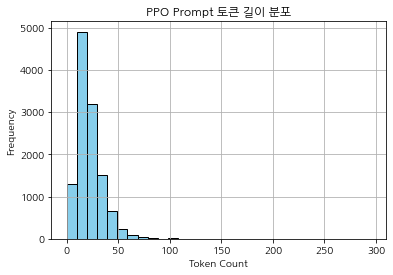

In [38]:
import matplotlib.pyplot as plt

# 1. 문자 수 리스트 추출
token_lengths = [len(item['prompt'].strip()) for item in ppo_data_dict if 'prompt' in item]

# 2. 간단한 통계 출력
print(f"총 샘플 수: {len(token_lengths)}")
print(f"최소 토큰 수: {min(token_lengths)}")
print(f"최대 토큰 수: {max(token_lengths)}")
print(f"평균 토큰 수: {sum(token_lengths)/len(token_lengths):.2f}")

# 3. 분포 시각화 (히스토그램)
plt.hist(token_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("PPO Prompt 토큰 길이 분포")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [39]:
check_len = 1

print('prompt')
total, short_count, ratio = get_short_length_ratio(ppo_data_dict, field='prompt', max_len=check_len)
print()

prompt
전체 항목 수: 12000
1자 이하 항목 수: 8
비율: 0.07%



In [40]:
for item in ppo_data_dict :
    if len(item['prompt']) ==1 :
         print(item )

{'prompt': '음'}
{'prompt': '네'}
{'prompt': '후'}
{'prompt': '휴'}
{'prompt': '헉'}


In [41]:
# prompt가 비어있지 않은 항목만 남김
ppo_data_dict = [item for item in ppo_data_dict if 'prompt' in item and len(item['prompt']) > 1]
len(ppo_data_dict)

11992

In [42]:
data_save_path_PPO = './data/clean_kochatgpt_1_PPO.jsonl'
save_jsonl(ppo_data_dict, data_save_path_PPO)

In [43]:
with open(data_save_path_PPO, "r", encoding='utf-8-sig') as json_file:
    ppo_tmp = json.load(json_file)

print(len(ppo_tmp))
ppo_tmp[:3]

11992


[{'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?'},
 {'prompt': '개포주공아파트는 몇 단지로 이루어져 있나?'},
 {'prompt': '김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는?'}]

# < 회고 >

###  데이터 정제 
1. 소문자로 변환
2. 이스케이프된 줄바꿈 문자열 제거 (예: '\\n', '\\n\\n')
3. 알파벳, 문장부호([?.!,]), 숫자, 한글만 남기고 모두 제거
4. 문장부호 양옆에 공백 추가
5. 단어로 'n' 제거 (띄어쓰기 기반, 예: " n " 또는 "n.")
6. 여러 공백을 하나로 축소
7. 문장 앞뒤 공백 제거

### SFT 데이타 
총 샘플 수: 12000
최소 토큰 수: 17
최대 토큰 수: 1111
평균 토큰 수: 159.31

1. prompt에 비어있거나, 의미없는 데이타(length=1) 삭제 

### RM 데이타
총 샘플 수: 10220
최소 prompt 토큰 수: 0
최대 prompt 토큰 수: 295
평균 prompt 토큰 수: 22.20

최소 completion_0 토큰 수: 0
최대 completion_0 토큰 수: 3088
평균 completion_0 토큰 수: 117.49

최소 completion_1 토큰 수: 0
최대 completion_1 토큰 수: 3694
평균 completion_1 토큰 수: 116.81

최소 completion_2 토큰 수: 0
최대 completion_2 토큰 수: 2979
평균 completion_2 토큰 수: 116.0

1. 비어있는 prompt, completion_x는 삭제 
2. prompt 의 length가 1인 데이타 확인후, 학습에 방해될 데이타로 판단하여 삭제함. 
3. completion_x의 length가 1인 데이타 중에서 해당 completion_x의 ranking이 2가 아니면 삭제함
4. 실제 ranking이 맞지 않는 경우가 보였으나, 따로 정제하지는 않음

### PPO 데이타 
총 샘플 수: 12000
최소 토큰 수: 0
최대 토큰 수: 295
평균 토큰 수: 22.18

1. prompt에 비어있거나, 의미없는 데이타(length=1) 삭제